### yolo v5s를 사용하기 위해 파이토치 설치

### https://github.com/ultralytics/yolov5

### https://pytorch.org/hub/

## Install and import dependencies

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!git clone https://github.com/ultralytics/yolov5 
!cd yolov5
!pip install -r requirements.txt

* gitpython>=3.1.30
* matplotlib>=3.3
* numpy>=1.18.5
* opencv-python>=4.1.1
* Pillow>=7.1.2
* psutil  # system resources
* PyYAML>=5.3.1
* requests>=2.23.0
* scipy>=1.4.1
* thop>=0.1.1  # FLOPs computation
* torch>=1.7.0  # see https://pytorch.org/get-started/locally (recommended)
* torchvision>=0.8.1
* tqdm>=4.64.0
* ultralytics>=8.0.111
* protobuf<=3.20.1  # https://github.com/ultralytics/yolov5/issues/8012

In [1]:
import torch  # 만약 임포트가 안되면 numpy를 업데이트 하시오.
import pandas as pd 
import numpy as np
from  matplotlib import pyplot as plt 
import cv2 
import glob 
import os 


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
# ultralytics/yolov5는 모델 저장소의 이름

Using cache found in C:\Users\USER/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-30 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


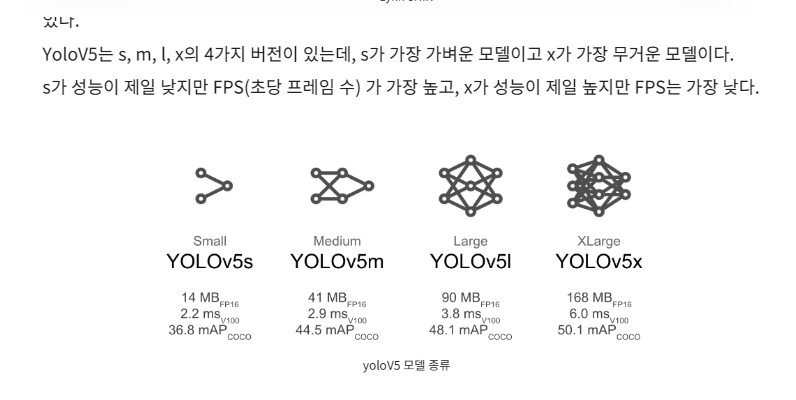

### 모델 불러오기

In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### 객체 탐지 해보기

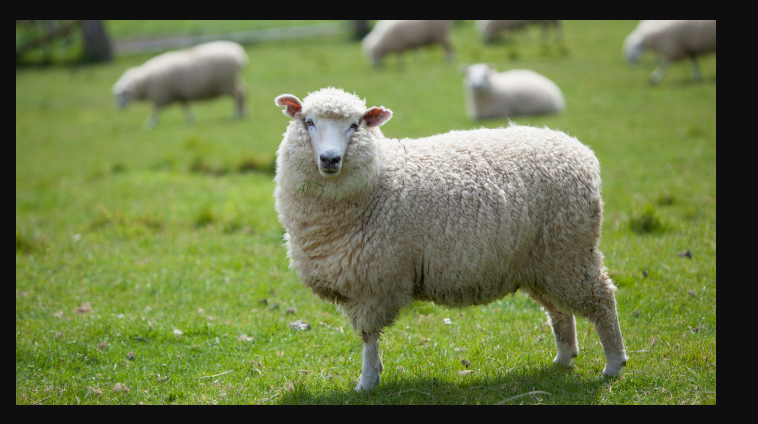

In [3]:
img = 'http://img.etoday.co.kr/pto_db/2021/08/20210810095409_1653628_700_385.jpg'
results = model(img)
print(results)

image 1/1: 385x700 6 sheeps
Speed: 172.4ms pre-process, 321.2ms inference, 95.5ms NMS per image at shape (1, 3, 352, 640)


In [87]:
import time
img = 'http://img.etoday.co.kr/pto_db/2021/08/20210810095409_1653628_700_385.jpg'
start_time = time.time()
results = model(img)
end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {:.2f} seconds'.format(execution_time))
results_str = str(results)
num = results_str.split(' ')
the_time_take = int(num[5].split('.')[0])+int (num[7].split('.')[0])+ int(num[9].split('.')[0])
print('걸린 시간은 ',the_time_take/1000)

Execution Time: 0.85 seconds
걸린 시간은  0.849


In [90]:
np.squeeze(results.render()).shape


(385, 700, 3)

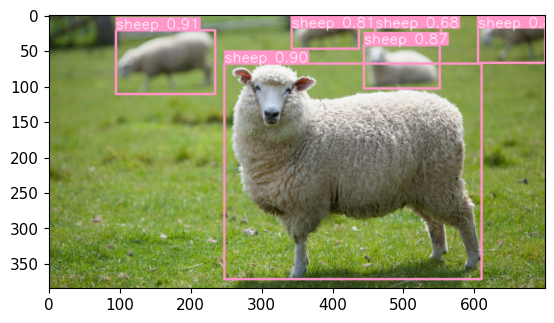

In [82]:
# `results`는 추론 또는 이미지 처리 작업의 결과를 담고 있는 객체

# image 1/1: 385x700 6 sheeps
# Speed: 791.8ms pre-process, 30.5ms inference, 2.5ms NMS per 
# image at shape (1, 3, 352, 640) 모델이 사용한 입력 이미지의 형태입니다. (배치 크기, 채널 수, 높이, 너비)를 나타냅니다.

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))

# `np.squeeze`는 배열의 형태에서 단일 차원 항목을 제거하는 데 사용됩니다.

plt.show()


### 실시간 

#### 실시간으로 객체 탐지를 하려면 fps가 30이 나와야한다고 배웠기 때문에 
#### 한 이미지당 대략 0.03초의 시간이 걸려야 한다는 것을 인지

In [4]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)

    cv2.imshow('Yolo',np.squeeze(results.render()))
    if cv2.waitKey(10)& 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


# 졸음 운전을 방지하기 위해   눈 떠있는 것과 눈 감고 있는 것을 실시간으로 구분하기

### 눈을 감고 있는 사진과 떠 있는 사진

In [1]:
import cv2 

cv2.i


In [ ]:
import cv2 
cap = cv2.VideoCapture(0)
i=0
if not os.path.exists('./sleep'):
    os.mkdir('./sleep')
while cap.isOpened():
    ret, frame = cap.read()
    if ret is False:
        break

    cv2.imsave(f'./sleep/{i}.png', frame)
    i+=1
    if cv2.waitKey(10)& 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


In [ ]:
cap = cv2.VideoCapture(0)
i=0
if not os.path.exists('./awake'):
    os.mkdir('./awake')
while cap.isOpened():
    ret, frame = cap.read()
    if ret is False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    plt.imsave(f'./awake/{i}.png', frame)
    i+=1
    if cv2.waitKey(10)& 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


### 라벨링 하기 

In [ ]:
!git clone https://github.com/heartexlabs/labelImg
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resoruces.qrc

In [ ]:
python train.py --img 320 --batch 16 --epochs 150 --data dataset.yaml --weights yolov5s.pt --workers 2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\new_teacher\yolov5\runs\train\exp\weights\best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\USER/.cache\torch\hub\master.zip
YOLOv5  2023-6-30 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
cap = cv2.VideoCapture(0)
answer = [] 
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Yolo',np.squeeze(results.render()))
    answer.append(np.squeeze(results.render()))
    if cv2.waitKey(10)& 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


https://sw-jxo1773.slack.com/files/U0544218B7H/F05FCHE4EAV/yolo.mp4

##### 이렇게 높게 나온 이유는 저희가 시간이 부족해 validation 이미지와 test 이미지를 따로 정해두지 않아서 그렇습니다.

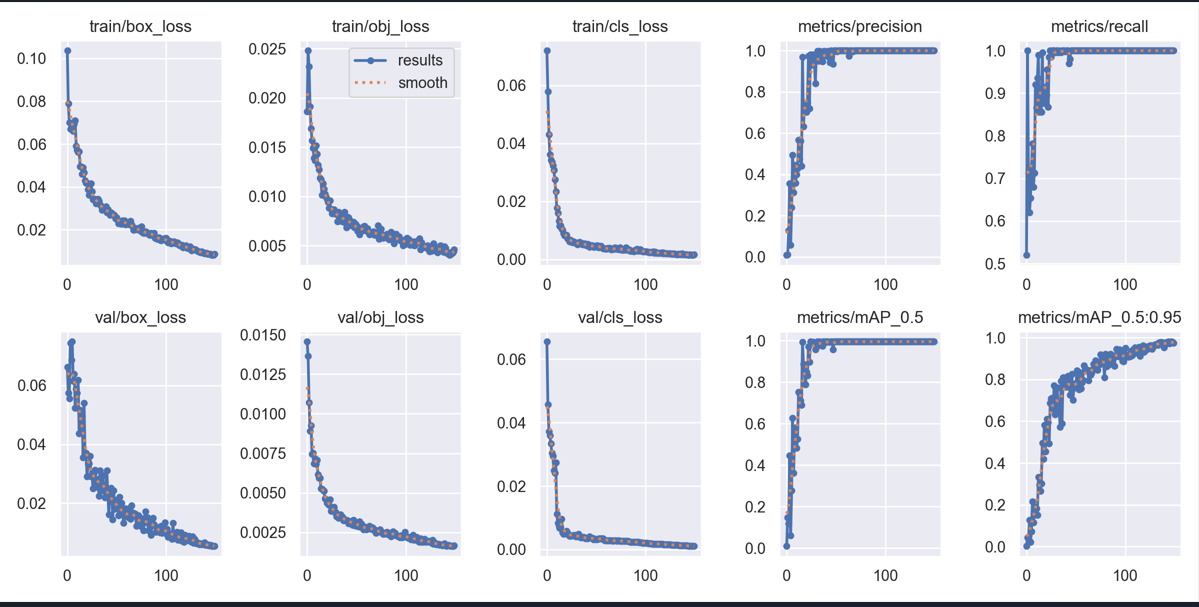

https://github.com/heartexlabs/labelImg

https://lynnshin.tistory.com/47